# NAIVE BAYES

### IMPORTS

In [49]:
%matplotlib inline
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import sklearn  
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix
warnings.filterwarnings("ignore")

### CARGAR DATOS

In [50]:
X = pandas.read_csv('X.csv', sep=',', na_values="")
y = pandas.read_csv('y.csv', sep=',', na_values="")
print(X.shape)
print(y.shape)
y2 = (y.values.ravel() == 'mucho').astype(int)

(7375, 1477)
(7375, 1)


### DIVISION DE LOS DATOS

In [51]:
(X_train, X_test,  y_train, y_test) = train_test_split(X, y2, test_size=.3, random_state=1)

### CALCULAR EL THRESHOLD

Selected threshold in 10-fold cross validation: 0.2149888246714101


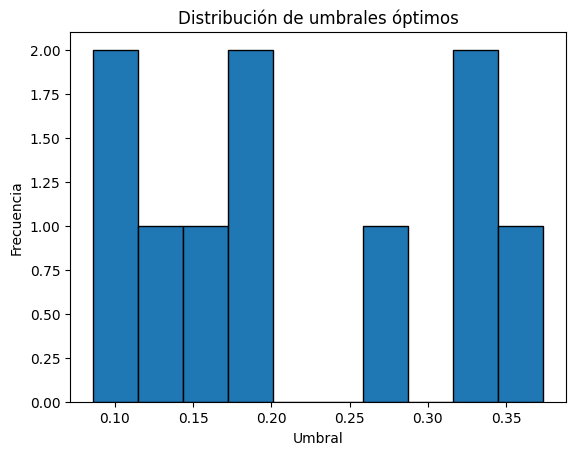

In [52]:
def filterp(th,ProbClass1):
    """ Given a treshold "th" and a set of probabilies of belonging to class 1 "ProbClass1", return predictions """ 
    y=np.zeros(ProbClass1.shape[0])
    for i,v in enumerate(ProbClass1):
        if ProbClass1[i]>th:
            y[i]=1
    return y  

clf = MultinomialNB()
lth=[]

# We do a 10 fold crossvalidation with 10 iterations
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train, y_train):
    X_train2, X_test2 = X.iloc[train_index], X.iloc[test_index]
    y_train2, y_test2 = y2[train_index], y2[test_index] 
    # Train with the training data of the iteration 
    clf.fit(X_train2, y_train2)
    # Obtaining probablity predictions for test data of the iterarion
    probs = clf.predict_proba(X_test2)
    # Collect probabilities of belonging to class 1
    ProbClass1 = probs[:,1]
    # Sort probabilities and generate pairs (threshold, f1-for-that-threshold) 
    res = np.array([[th,f1_score(y_test2,filterp(th,ProbClass1),pos_label=1)] for th in np.sort(ProbClass1)])

    # Uncomment the following lines if you want to plot at each iteration how f1-score evolves increasing the threshold 
    #plt.plot(res[:,0],res[:,1])
    #plt.show()

    # Find the threshold that has maximum value of f1-score
    maxF = np.max(res[:,1])
    pl = np.argmax(res[:,1])
    optimal_th = res[pl,0]
    
    # Store the optimal threshold found for the current iteration
    lth.append(optimal_th)

# Compute the average threshold for all 10 iterations    
thdef = np.mean(lth)
print("Selected threshold in 10-fold cross validation:", thdef)
plt.hist(lth, bins=10, edgecolor='black')
plt.title("Distribución de umbrales óptimos")
plt.xlabel("Umbral")
plt.ylabel("Frecuencia")
plt.show()



### EVALUACIÓN DEL MODELO

0.6475372797107998
              precision    recall  f1-score   support

           0       0.79      0.45      0.58      1173
           1       0.58      0.87      0.70      1040

    accuracy                           0.65      2213
   macro avg       0.69      0.66      0.64      2213
weighted avg       0.69      0.65      0.63      2213



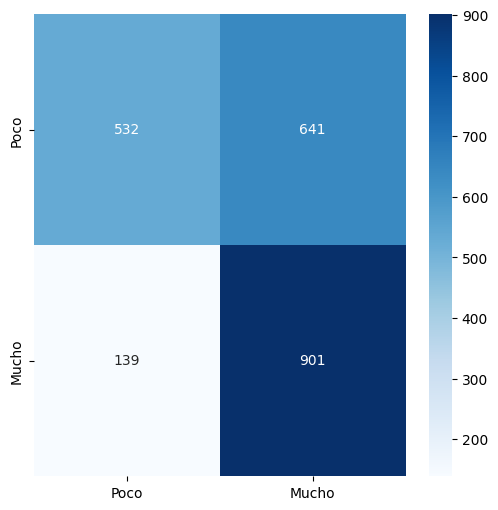

In [53]:
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
pred = filterp(thdef, probs[:, 1])
print(sklearn.metrics.accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
cm = (confusion_matrix(y_test, pred))
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Poco", "Mucho"], yticklabels=["Poco", "Mucho"])
plt.show()

0.7121554450971532
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1173
           1       0.71      0.66      0.68      1040

    accuracy                           0.71      2213
   macro avg       0.71      0.71      0.71      2213
weighted avg       0.71      0.71      0.71      2213



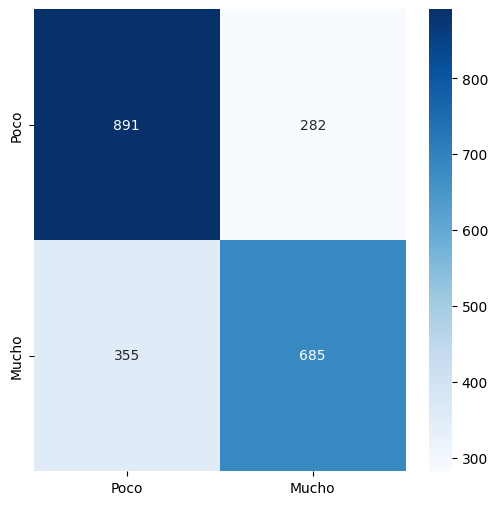

In [54]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(sklearn.metrics.accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
cm = (confusion_matrix(y_test, pred))
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Poco", "Mucho"], yticklabels=["Poco", "Mucho"])
plt.show()